In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

1815.0


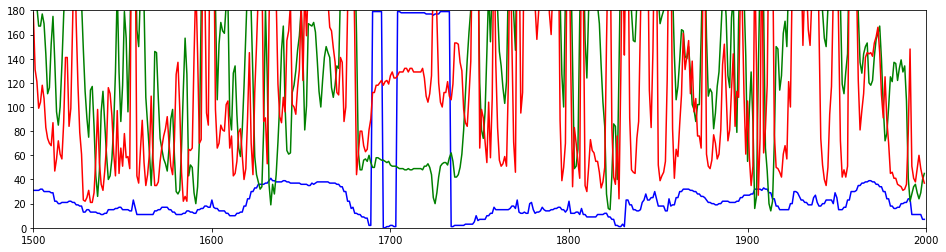

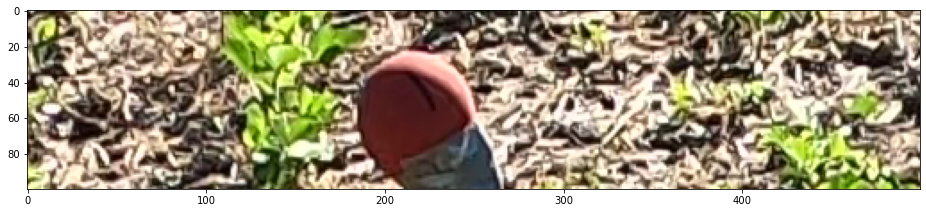

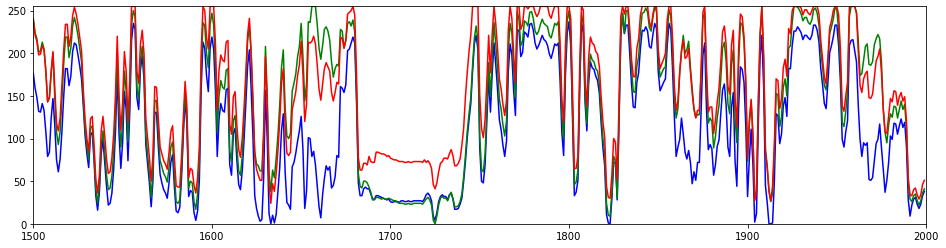

In [2]:
filepath = '.\\data\\DE-C5D-1-CALIB-FIELD 7-GX010085.MP4'

cap = cv2.VideoCapture(filepath)
while not cap.isOpened():
    cap = cv2.VideoCapture(filepath)
    cv2.waitKey(1000)
    print("Wait for the header")

pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

count = 0
empty = 0
#for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):

WAITCOUNTFREQ = 30
waitCount = 0
for i in range(1):
    ret, frame = cap.read()
    if ret == True:
        count += 1
        if waitCount == 0:
            BGR = frame.copy()
            HLS = cv2.cvtColor(BGR, cv2.COLOR_BGR2HLS)
            strip = HLS[90,1500:2000,:]
            plt.figure(figsize=(16,4))
            plt.plot(np.arange(1500,2000),strip[:,0],color='blue', label='Blue')
            plt.plot(np.arange(1500,2000),strip[:,1],color='green', label='Green')
            plt.plot(np.arange(1500,2000),strip[:,2],color='red', label='Red')
            plt.axis([1500, 2000, 0, 180])
            plt.show()
            posRedHueMask = (HLS[:,:,0]<20).astype('uint8')
            negRedHueMask = (HLS[:,:,0]>160).astype('uint8')
            redHueMask = np.bitwise_or(posRedHueMask,negRedHueMask).astype('uint8')
            rows = np.shape(frame)[0]
            cols = np.shape(frame)[1]
            b = cv2.medianBlur(frame[:,:,0],11)
            g = cv2.medianBlur(frame[:,:,1],11)
            r = cv2.medianBlur(frame[:,:,2],11)

            #2R-G-B
            ExR = 2*r.astype('int') - b.astype('int') - g.astype('int')
            ExW = r.astype('int') + b.astype('int') + g.astype('int')
            red_img = np.zeros([rows,cols,3],dtype='uint8')

            for c in range(3):
                red_img[:,:,c] = np.multiply(frame[:,:,c],redHueMask).astype('uint8')
            
            #cv2.line(red_img,(1500,90),(2000,90),(255,0,0),5)
            plt.figure(figsize=(16,16))
            plt.imshow(cv2.cvtColor(frame[40:140,1500:2000,:],cv2.COLOR_BGR2RGB))
            plt.show()
            
            plt.figure(figsize=(16,4))
            strip = BGR[90,1500:2000,:]
            plt.plot(np.arange(1500,2000),strip[:,0],color='blue', label='Blue')
            plt.plot(np.arange(1500,2000),strip[:,1],color='green', label='Green')
            plt.plot(np.arange(1500,2000),strip[:,2],color='red', label='Red')
            plt.axis([1500, 2000, 0, 255])
            plt.show()
            waitCount = WAITCOUNTFREQ
        else:
            waitCount -= 1
    else:
        empty += 1